# **MNIST** Hand written digit Classififcation using Keras
### **Optimization algorithm :**  Adam optimizer
### **Activation Function:**  Relu Acitvation
#### **6** Different architectures are used each with and without Batch normalization and Drop out total 12 architectures input layer of size **784** and ouput of size **10**.
They are :
1. 784 - 600 - 200 - 10 (2 hidden layers)
2. 784 - 550 - 150 - 10 (2 hiddent layers)
3. 784 - 600 - 300 - 150 - 10 (3 hidden layers)
4. 784 - 550 - 350 - 200 - 10 (3 hidden layers)
5. 784 - 700 - 600 - 500 - 400 - 200 - 10 ( 5 hidden layers)
6. 784 - 550 - 450 - 350 - 250 - 150 - 10 (5 hidden Layers)

Observations are written at the bottom of the file


### **Architecture:** 784(input)---600(Hidden_Layer_1)---200(Hidden_layer_2)---10(ouput)
**Without Droput and Batch normalization**

In [0]:
#plotting function to compare the training accuracy and testing accuracy.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Testing Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.style.use('seaborn')
    plt.legend()
    fig.canvas.draw()

In [2]:

#importing keras libraries 
from keras.datasets import mnist
from keras.models import Sequential
from keras.initializers import he_normal as he
from keras.layers import Dense, Dropout, BatchNormalization
import keras.utils as np_utils


#Parameters initialization
batch_size = 128
output_dim = 10
epochs = 20

(X_train, y_train), (X_test, y_test) = mnist.load_data()


Using TensorFlow backend.


In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep = '\n\n')

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)


In [4]:
#reshaping the Data
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
print(x_train.shape, x_test.shape, sep = '\n\n')

print("Before Normalizing : ",x_train[0])

#normalizing the Dataset
x_train= x_train/255
x_test = x_test/255
print("After Normalizing :",x_train[0])

(60000, 784)

(10000, 784)
Before Normalizing :  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 2

In [5]:
#OneHot encoding of the Y labels dependent labels
from keras.utils import np_utils
print("Before One hot Encoding: ", y_train[0])
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print("After one hot encoding: ",y_train[0])


Before One hot Encoding:  5
After one hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
#Building the MLP(multi_layer_perceptron_model) or neural_network
model_relu = Sequential()

#Building the first hidden layer 
model_relu.add(Dense(600, activation='relu', input_shape = (784,), kernel_initializer= he(seed=None) ))

#Building the Second hidden layer
model_relu.add(Dense(200, activation = 'relu',kernel_initializer= he(seed = None) ))

#Building the output layer
model_relu.add(Dense(output_dim, activation = 'softmax'))

#printing the architecture of the model
model_relu.summary()
model_relu.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

history = model_relu.fit(x_train, y_train,batch_size = batch_size, epochs = epochs, verbose = 1 , validation_data = (x_test, y_test))

score = model_relu.evaluate(x_test, y_test, verbose = 1)
print("Validation loss :",  score[0])
print("Validation accuracy :", score[1])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               120200    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 593,210
Trainable params: 593,210
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2222 - accuracy: 0.9340 - val_loss: 0.1023 - val_accuracy: 0.9666
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0821 - accuracy: 0.9748 - val_loss: 0.0799 - val_accuracy: 0.9753
Epoch 3/20
60000/60000 [==========

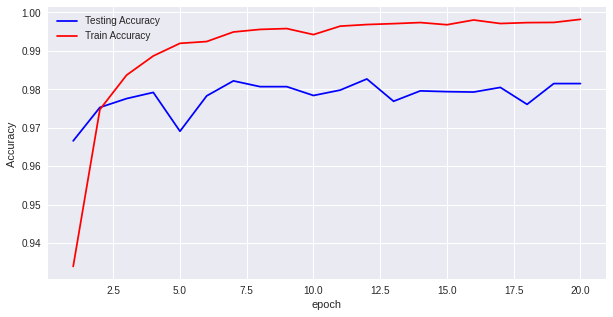

In [7]:
plt.style.use('seaborn')
fig,ax = plt.subplots(1,1, figsize= (10,5))
ax.set_xlabel('epoch') ; ax.set_ylabel("Accuracy ")

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)
plt.show()

### **Architecture:** 784(input)---600(Hidden_Layer_1)---200(Hidden_layer_2)---10(ouput)
**With Droput and Batch normalization**


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 600)               471000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               120200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

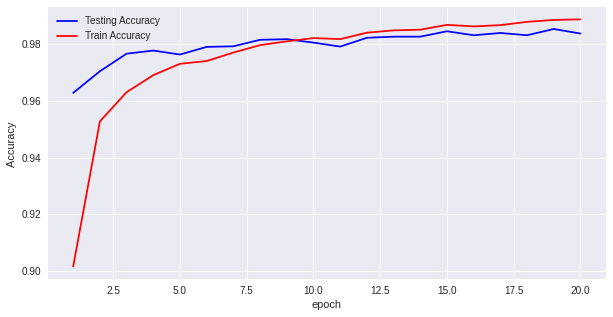

In [8]:
model_relu = Sequential()

#building hidden layer 1 with the drop out rate 0.4 and adding Batch normalization.
model_relu.add(Dense(600, input_shape = (784,), activation='relu', kernel_initializer=he(seed = None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

#Building hidden layer 2 with the drop out rate 0.4 and adding Batch normalization.
model_relu.add(Dense(200, activation='relu', kernel_initializer=he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

#building Output layer
model_relu.add(Dense(10, activation='softmax'))
model_relu.summary()
model_relu.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

history = model_relu.fit(x_train, y_train, epochs = epochs, batch_size = batch_size,verbose = 1, validation_data = (x_test, y_test))

score = model_relu.evaluate(x_test, y_test, verbose = 0)
print("Validation Loss", score[0])
print("Validation Score: ", score[1])

#plotting the accuracy of the model
plt.style.use('seaborn')
fig,ax = plt.subplots(1,1, figsize= (10,5))
ax.set_xlabel('epoch') ; ax.set_ylabel("Accuracy ")

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)
plt.show()



## **Architecture:** 784(input)---550(Hidden_Layer_1)---150(Hidden_layer_2)---10(ouput)
### Without Dropout and batch_normalization


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 550)               431750    
_________________________________________________________________
dense_8 (Dense)              (None, 150)               82650     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1510      
Total params: 515,910
Trainable params: 515,910
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.2294 - accuracy: 0.9331 - val_loss: 0.1039 - val_accuracy: 0.9690
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0850 - accuracy: 0.9739 - val_loss: 0.0847 - val_accuracy: 0.9731
Epoch 3/20
60000/60000 [==========

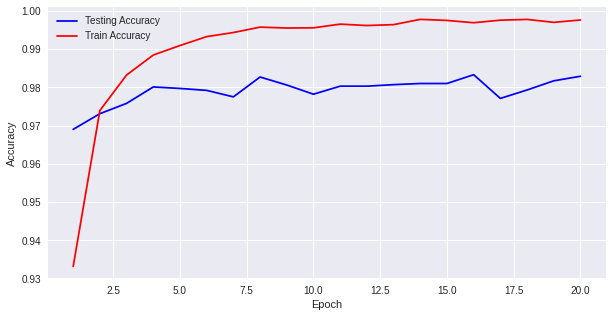

In [9]:
model_relu = Sequential()

model_relu.add(Dense(550, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))

model_relu.add(Dense(150, activation = 'relu', kernel_initializer= he(seed=None)))

model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)
plt.show()

## **Architecture:** 784(input)---550(Hidden_Layer_1)---150(Hidden_layer_2)---10(ouput)
### With Dropout and batch_normalization



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 550)               431750    
_________________________________________________________________
batch_normalization_3 (Batch (None, 550)               2200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 550)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 150)               82650     
_________________________________________________________________
batch_normalization_4 (Batch (None, 150)               600       
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

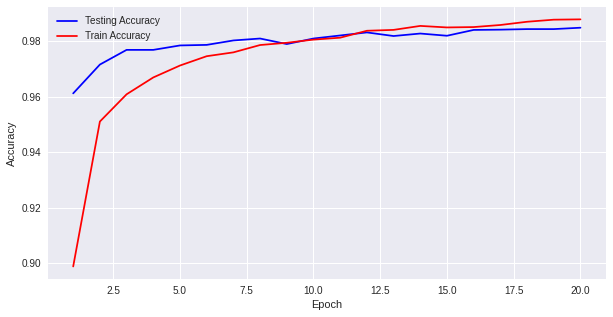

In [10]:
model_relu = Sequential()

model_relu.add(Dense(550, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(150, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
va = history.history['val_accuracy']
ta = history.history['accuracy']
plt_dynamic(x, va, ta, ax)
plt.show()

## **Architecture:** 784(input)---600(Hidden_Layer_1)---300(Hidden_layer_2)--150(hidden_layer_3)---10(ouput)
### without Batch normalization  and Dropout

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_14 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_15 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1510      
Total params: 697,960
Trainable params: 697,960
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.2140 - accuracy: 0.9363 - val_loss: 0.1008 - val_accuracy: 0.9673
Epoch 2/20
60000/60000 [========================

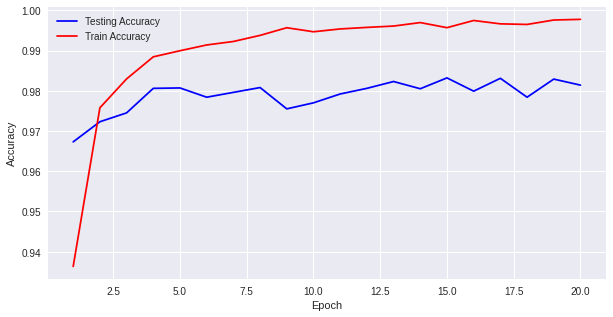

In [11]:
model_relu = Sequential()

model_relu.add(Dense(600, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))

model_relu.add(Dense(300, activation='relu', kernel_initializer= he(seed=None)))

model_relu.add(Dense(150, activation='relu', kernel_initializer= he(seed=None)))

model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)
plt.show()

## **Architecture:** 784(input)---600(Hidden_Layer_1)---300(Hidden_layer_2)--150(hidden_layer_3)---10(ouput)
### with Batch normalization  and Dropout

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_5 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 150)              

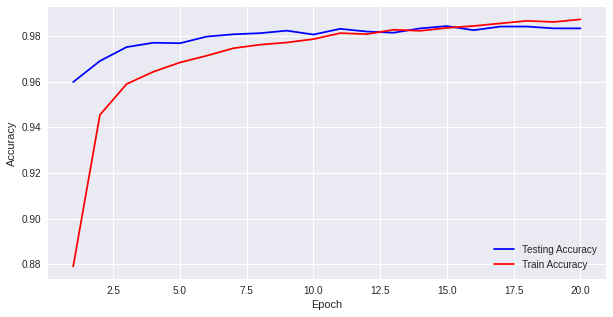

In [12]:
model_relu = Sequential()

model_relu.add(Dense(600, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(300, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))


model_relu.add(Dense(150, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
va = history.history['val_accuracy']
ta = history.history['accuracy']
plt_dynamic(x, va, ta, ax)
plt.show()

## **Architecture:** 784(input)---550(Hidden_Layer_1)---350(Hidden_layer_2)--200(hidden_layer_3)---10(ouput)
### without Batch normalization and Dropout


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 550)               431750    
_________________________________________________________________
dense_22 (Dense)             (None, 350)               192850    
_________________________________________________________________
dense_23 (Dense)             (None, 200)               70200     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2010      
Total params: 696,810
Trainable params: 696,810
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.2103 - accuracy: 0.9367 - val_loss: 0.0937 - val_accuracy: 0.9705
Epoch 2/20
60000/60000 [========================

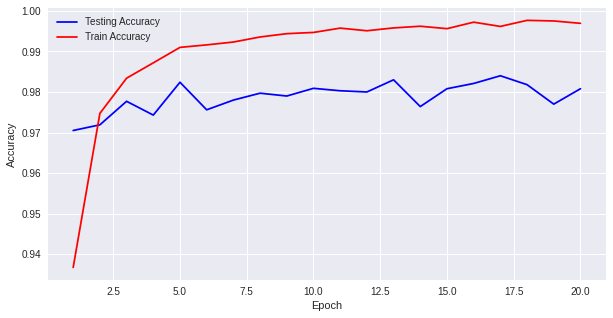

In [13]:
model_relu = Sequential()

model_relu.add(Dense(550, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))

model_relu.add(Dense(350, activation = 'relu', kernel_initializer= he(seed=None)))

model_relu.add(Dense(200, activation = 'relu', kernel_initializer= he(seed=None)))

model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)
plt.show()

## **Architecture:** 784(input)---550(Hidden_Layer_1)---350(Hidden_layer_2)--200(hidden_layer_3)---10(ouput)
### with Batch normalization and Dropout



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 550)               431750    
_________________________________________________________________
batch_normalization_8 (Batch (None, 550)               2200      
_________________________________________________________________
dropout_8 (Dropout)          (None, 550)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 350)               192850    
_________________________________________________________________
batch_normalization_9 (Batch (None, 350)               1400      
_________________________________________________________________
dropout_9 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 200)              

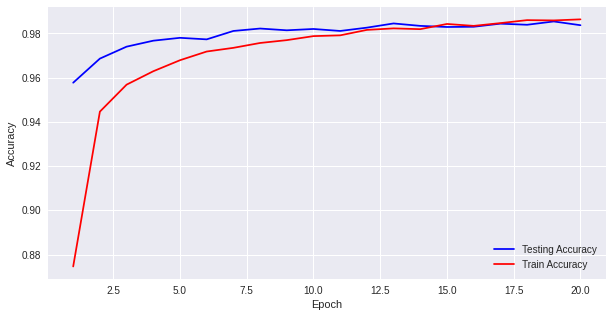

In [14]:
model_relu = Sequential()

model_relu.add(Dense(550, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(350, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(200, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
va = history.history['val_accuracy']
ta = history.history['accuracy']
plt_dynamic(x, va, ta, ax)
plt.show()

## **Architecture:** 
784(input)--700(Hidden_Layer_1)--600(Hidden_layer_2)--500(hidden_layer_3)--400(hidden_layer_4)--200(hidden_layer_5)--10(ouput)
### Without Dropout and Batch normalization

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 700)               549500    
_________________________________________________________________
dense_30 (Dense)             (None, 600)               420600    
_________________________________________________________________
dense_31 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_32 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_33 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                2010      
Total params: 1,553,210
Trainable params: 1,553,210
Non-trainable params: 0
____________________________________________

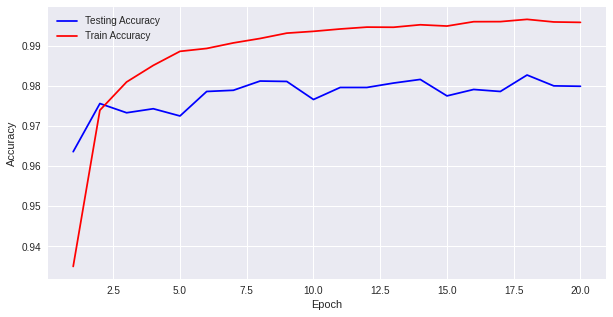

In [15]:
model_relu = Sequential()

model_relu.add(Dense(700, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))

model_relu.add(Dense(600, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(Dense(500, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(Dense(400, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(Dense(200, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)
plt.show()

## **Architecture:** 
784(input)--700(Hidden_Layer_1)--600(Hidden_layer_2)--500(hidden_layer_3)--400(hidden_layer_4)--200(hidden_layer_5)--10(ouput)
### With Dropout and Batch normalization

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 700)               549500    
_________________________________________________________________
batch_normalization_11 (Batc (None, 700)               2800      
_________________________________________________________________
dropout_11 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 600)               420600    
_________________________________________________________________
batch_normalization_12 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_12 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 500)             

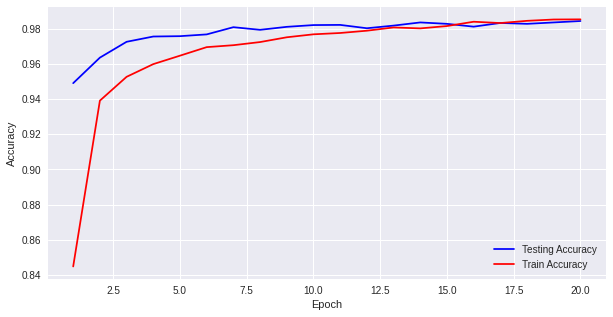

In [16]:
model_relu = Sequential()

model_relu.add(Dense(700, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(600, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(500, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(400, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(200, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax)
plt.show()

## **Architecture:** 
784(input)--650(Hidden_Layer_1)--550(Hidden_layer_2)--450(hidden_layer_3)--250(hidden_layer_4)--150(hidden_layer_5)--10(ouput)
### Without Dropout and normalization

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 650)               510250    
_________________________________________________________________
dense_42 (Dense)             (None, 550)               358050    
_________________________________________________________________
dense_43 (Dense)             (None, 450)               247950    
_________________________________________________________________
dense_44 (Dense)             (None, 250)               112750    
_________________________________________________________________
dense_45 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1510      
Total params: 1,268,160
Trainable params: 1,268,160
Non-trainable params: 0
___________________________________________

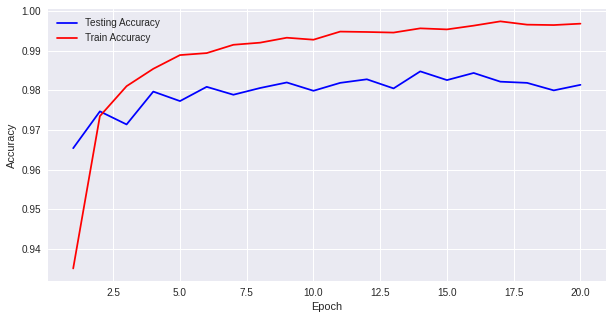

In [17]:
model_relu = Sequential()

model_relu.add(Dense(650, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))


model_relu.add(Dense(550, activation = 'relu', kernel_initializer= he(seed=None)))


model_relu.add(Dense(450, activation = 'relu', kernel_initializer= he(seed=None)))


model_relu.add(Dense(250, activation = 'relu', kernel_initializer= he(seed=None)))


model_relu.add(Dense(150, activation = 'relu', kernel_initializer= he(seed=None)))


model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
va = history.history['val_accuracy']
ta = history.history['accuracy']
plt_dynamic(x, va, ta, ax)
plt.show()

## **Architecture:** 
784(input)--650(Hidden_Layer_1)--550(Hidden_layer_2)--450(hidden_layer_3)--250(hidden_layer_4)--150(hidden_layer_5)--10(ouput)
### With Dropout and normalization

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 650)               510250    
_________________________________________________________________
batch_normalization_16 (Batc (None, 650)               2600      
_________________________________________________________________
dropout_16 (Dropout)         (None, 650)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 550)               358050    
_________________________________________________________________
batch_normalization_17 (Batc (None, 550)               2200      
_________________________________________________________________
dropout_17 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 450)             

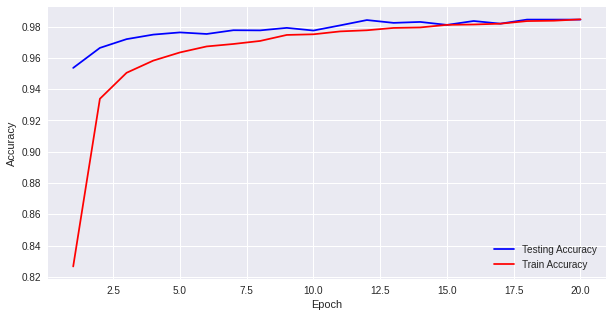

In [18]:
model_relu = Sequential()

model_relu.add(Dense(650, activation='relu', input_shape=(784, ), kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(550, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(450, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(250, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(150, activation = 'relu', kernel_initializer= he(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))

model_relu.add(Dense(10, activation='softmax'))

model_relu.summary()

model_relu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_test, y_test))

score = model_relu.evaluate(x_test, y_test) 
print("Validation Loss : ", score[0])
print("Validation Accuracy: ", score[1])

plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
x = list(range(1, epochs+1))
va = history.history['val_accuracy']
ta = history.history['accuracy']
plt_dynamic(x, va, ta, ax)
plt.show()

# **Observations Based on the Accuracy levels in plotted diagrams :**


*   In each model without ***Dropout rate and Batch normalization** the **training accuracy** is increasing when compared to the **testing accuracy** which implies that the model is overfitting. Because in order to have perfectly fitted model the **testing accuracy** should be greater than or equal **training accuracy**.  

*   In each model with **Droput rate and Batch Normalization** the **testing accuracy is trying to match with **testing accuracy** which implies the best fit model.

*   As the number of layers in increases we can see that the model is becoming **best fitted** as testing accuracy and training accuracy are trying to reaching the same position. 


*   So to conclude the Model becomes best fitted when the Batch normalization, Dropout rates  and increase number of hidden layers are used. 

* But increasing number hidden layers to higher level may also require huge computational power and it can also lead to the overfiiting of the model so choosing the optimal number of layers will increases the chance of obtaining the best fit neural network model.





